Medical Cost Personal Datasets
https://www.kaggle.com/datasets/mirichoi0218/insurance
1.   Обучите модель линейной регрессии на полиномиальных признаках. Чему равно значение метрик?
2.   Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.
3. Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000. Чему равно значение метрик?
4. Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию. Чему равно значение метрик?
5. По желанию: подобрать лучшее значение alpha(если оно есть).

In [1]:
#Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

%matplotlib inline
plt.style.use('seaborn-v0_8')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#Чтение датафрейма
insurance_data = pd.read_csv('drive/MyDrive/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
#Посмотрим на данные(сколько строк, есть ли пропуски а также типы данных)
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
#кодируем бинарные категориальные признаки
insurance_data['smoker'] = insurance_data['smoker'].apply(lambda x: 0 if x == 'no' else 1)    # 0-no, 1-yes
insurance_data['sex'] = insurance_data['sex'].apply(lambda x: 0 if x == 'female' else 1)      # 0-female, 1-male

#оставшиеся категориальные признаки кодируем с помощью OneHot
insurance_data = pd.get_dummies(insurance_data)
insurance_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
5,31,0,25.740,0,0,3756.62160,False,False,True,False
6,46,0,33.440,1,0,8240.58960,False,False,True,False
7,37,0,27.740,3,0,7281.50560,False,True,False,False
8,37,1,29.830,2,0,6406.41070,True,False,False,False
9,60,0,25.840,0,0,28923.13692,False,True,False,False


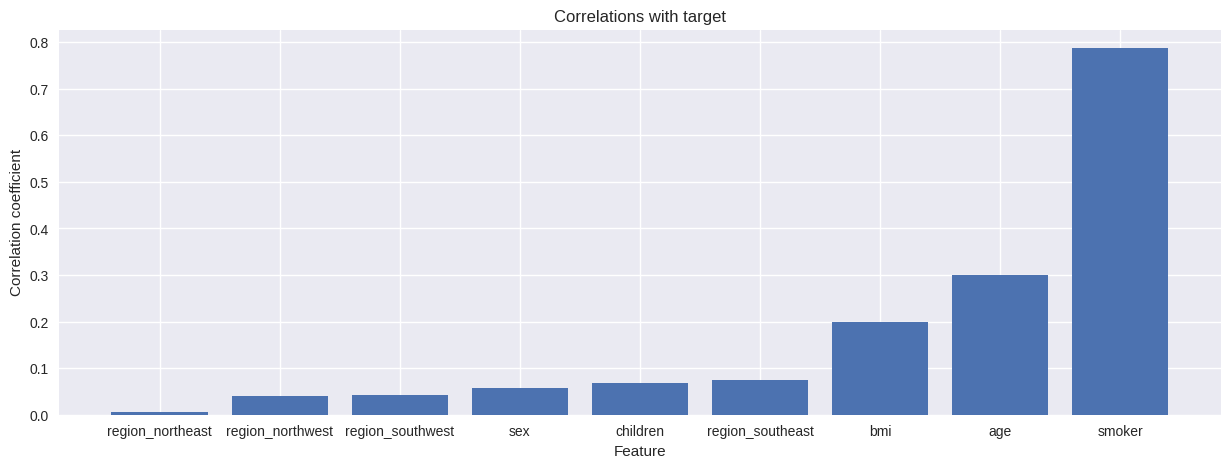

In [18]:
#Вычисляем модуль корреляции
corr_with_target = insurance_data.corr()['charges'].abs().sort_values()

#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('charges')

#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(15, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

#Признак charges больше всего коррелирует с smoker

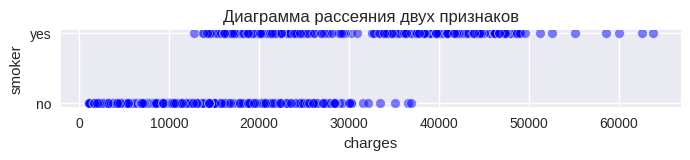

In [28]:
#Построим диаграмму рассеяния признаков charges и smoker
plt.figure(figsize=(8, 1))
sns.scatterplot(data=insurance_data, x='charges', y='smoker', color='blue', alpha=0.5)
plt.xlabel('charges')
plt.ylabel('smoker')
plt.grid(True)
plt.show()

In [20]:
#Построим линейную регрессию используя эти признаки
X = insurance_data[['smoker']] #матрица наблюдений
y = insurance_data['charges'] #вектор правильных ответов
X.head()

,smoker
0,1
1,0
2,0
3,0
4,0


In [23]:
from sklearn.model_selection import train_test_split
features = insurance_data.drop('charges', axis=1).columns
X, y = insurance_data[features], insurance_data['charges']
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (936, 9) (936,)
Test: (402, 9) (402,)


In [24]:
from sklearn import preprocessing

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(936, 54)
(402, 54)


In [25]:
print(type(X_train_poly))
print(type(X_test_poly))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [27]:
# Теперь попробуем скормить наши данные модели линейной регрессии, чтобы найти коэффициенты полинома по МНК-алгоритму

#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)

#Рассчитываем коэффициент детерминации для двух выборок
print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict_poly)))
print('Train RMSE: {:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_poly))))
print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly)*100))
print('\n')
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
print('Test RMSE: {:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_poly))))
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))


Train R^2: 0.855
Train MAE: 2833
Train RMSE: 4663
Train MAPE: 29


Test R^2: 0.823
Test MAE: 2901
Test RMSE: 4963
Test MAPE: 30


In [28]:
# выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

print(np.round(lr_model_poly.coef_, 3))

[-8.725900e+01 -1.100950e+02  4.121260e+02  9.575970e+02 -9.791495e+03
 -1.429850e+02 -1.169060e+03  1.320166e+03 -8.120000e+00  4.039000e+00
 -3.926000e+00  1.888000e+00 -3.327000e+00 -5.243000e+00 -5.023800e+01
 -3.200900e+01  1.663000e+00 -6.675000e+00 -1.100950e+02  1.045800e+01
 -2.484660e+02  3.351290e+02 -8.941700e+01  5.414810e+02 -6.816000e+01
 -4.939990e+02 -9.208000e+00 -1.648000e+00  1.504561e+03  1.680400e+02
  1.549860e+02  4.101000e+00  8.499900e+01 -5.328900e+01 -3.316730e+02
  4.154690e+02  5.677670e+02  1.754400e+02 -2.010790e+02 -9.791495e+03
 -2.171794e+03 -1.825939e+03 -3.876001e+03 -1.917760e+03 -1.429850e+02
  0.000000e+00  0.000000e+00  0.000000e+00 -1.169060e+03  0.000000e+00
  0.000000e+00  1.320166e+03  0.000000e+00 -8.120000e+00]


In [29]:
#Построим линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках

#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)
#Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц

print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(936, 54)
(402, 54)


In [30]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=1, max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Значения метрик для тренировочной и тестовой выборок
print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict_poly)))
print('Train RMSE: {:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_poly))))
print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly)*100))
print('\n')
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
print('Test RMSE: {:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_poly))))
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

Train R^2: 0.855
Train MAE: 2833
Train RMSE: 4663
Train MAPE: 29


Test R^2: 0.823
Test MAE: 2900
Test RMSE: 4962
Test MAPE: 30


In [31]:
# Теперь давайте на тех же данных обучим модель линейной регрессии с L2-регуляризацией.

#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=1)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Значения метрик для тренировочной и тестовой выборок
print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict_poly)))
print('Train RMSE: {:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_poly))))
print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly)*100))
print('\n')
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
print('Test RMSE: {:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_poly))))
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

Train R^2: 0.855
Train MAE: 2834
Train RMSE: 4663
Train MAPE: 29


Test R^2: 0.823
Test MAE: 2902
Test RMSE: 4962
Test MAPE: 30


In [32]:
# Подбор alpha

#Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)
#Создаём пустые списки, в которые будем добавлять результаты
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=2000)
    #Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    #Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.575e+09, tolerance: 1.402e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.945e+07, tolerance: 1.402e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.405e+07, tolerance: 1.402e

In [33]:
test_scores

[0.8226493153197604,
 0.822652187835519,
 0.8226548662320341,
 0.8226575594315275,
 0.8226602846260995,
 0.8226629780884642,
 0.8226656264444923,
 0.8226683084074307,
 0.8226709881885474,
 0.8226736657878428,
 0.8226763412053165,
 0.8226791049090743,
 0.822681784157469,
 0.8226843953994616,
 0.8226870652709855,
 0.8226897329649094,
 0.8226918389373294,
 0.8226944866062837,
 0.822696865866111,
 0.8226995049650923]

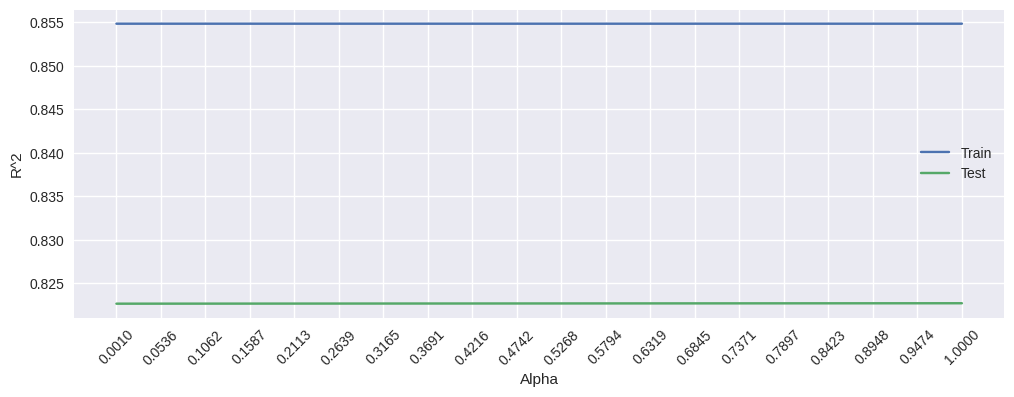

In [34]:
#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

Параллельность говорит об отсутствии оптимального alpha